# Machine Learning Mastery With Python
## A Comprehensive Research Study on Machine Learning Algorithms and Techniques

---

**Author:** Research Notebook  
**Date:** November 2025  
**Reference:** Machine Learning Mastery With Python by Jason Brownlee

---

### Abstract

This notebook presents a comprehensive implementation of machine learning techniques in Python, covering the complete workflow from data loading and preprocessing to model evaluation and deployment. We systematically explore classification and regression algorithms, ensemble methods, feature selection techniques, and hyperparameter tuning strategies using the scikit-learn library.

### Table of Contents

1. **Part I: Data Loading and Preparation**
   - Loading CSV Data
   - Descriptive Statistics
   - Data Visualization
   
2. **Part II: Data Preprocessing**
   - Rescaling, Standardization, Normalization
   - Binarization
   
3. **Part III: Feature Selection**
   - Univariate Selection
   - Recursive Feature Elimination
   - Principal Component Analysis
   - Feature Importance
   
4. **Part IV: Model Evaluation**
   - Resampling Methods
   - Classification Metrics
   - Regression Metrics
   
5. **Part V: Machine Learning Algorithms**
   - Classification Algorithms
   - Regression Algorithms
   - Algorithm Comparison
   
6. **Part VI: Advanced Techniques**
   - Pipelines
   - Ensemble Methods
   - Hyperparameter Tuning
   - Model Persistence

---
# PART I: DATA LOADING AND PREPARATION
---

## 1. Import Required Libraries

Import essential libraries for data manipulation, visualization, and machine learning.

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from pandas.plotting import scatter_matrix
import csv
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
np.set_printoptions(precision=3)

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.3.1
Pandas version: 2.3.1


## 2. Load Dataset with CSV Module

The Python standard library provides a CSV module for reading delimited data files. This approach gives fine-grained control over how data is loaded.

In [2]:
# Load CSV using Python Standard Library
# Using Pima Indians Diabetes Dataset from UCI ML Repository
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Download the data
import urllib.request
urllib.request.urlretrieve(url, "pima-indians-diabetes.csv")

# Load with csv module
filename = 'pima-indians-diabetes.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data_csv = np.array(x).astype('float')
print("Data shape loaded with CSV module:", data_csv.shape)
print("\nFirst 5 rows:")
print(data_csv[:5, :])

Data shape loaded with CSV module: (768, 9)

First 5 rows:
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01 1.000e+00]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01 0.000e+00]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01 1.000e+00]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01 0.000e+00]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01 1.000e+00]]


## 3. Load Dataset with NumPy

NumPy's `loadtxt()` function is efficient for loading numerical data directly into NumPy arrays.

In [3]:
# Load CSV with NumPy
filename = 'pima-indians-diabetes.csv'
data_numpy = np.loadtxt(filename, delimiter=',')

print("Data shape loaded with NumPy:", data_numpy.shape)
print("\nFirst 5 rows:")
print(data_numpy[:5, :])

Data shape loaded with NumPy: (768, 9)

First 5 rows:
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01 1.000e+00]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01 0.000e+00]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01 1.000e+00]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01 0.000e+00]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01 1.000e+00]]


## 4. Load Dataset with Pandas

Pandas `read_csv()` is the most flexible and commonly used method for loading data. It supports various data types and handles headers automatically.

In [4]:
# Load CSV with Pandas
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

print("Data shape loaded with Pandas:", data.shape)
print("\nFirst 20 rows:")
data.head(20)

Data shape loaded with Pandas: (768, 9)

First 20 rows:


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## 5. Descriptive Statistics Analysis

Understanding your data through descriptive statistics is crucial before applying any machine learning algorithm.

### 5.1 Data Dimensions and Types

In [5]:
# Data Dimensions
print("=" * 60)
print("DATA DIMENSIONS AND TYPES")
print("=" * 60)

# Shape of data
print(f"\nData Shape: {data.shape}")
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")

# Data Types
print("\n" + "-" * 40)
print("Data Types:")
print("-" * 40)
print(data.dtypes)

DATA DIMENSIONS AND TYPES

Data Shape: (768, 9)
Number of Rows: 768
Number of Columns: 9

----------------------------------------
Data Types:
----------------------------------------
preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


### 5.2 Statistical Summary

In [6]:
# Descriptive Statistics
print("=" * 80)
print("DESCRIPTIVE STATISTICS")
print("=" * 80)

# Using describe() function
pd.set_option('display.precision', 3)
description = data.describe()
print(description)

DESCRIPTIVE STATISTICS
          preg     plas     pres     skin     test     mass     pedi      age  \
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000   
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241   
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760   
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000   
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000   
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000   
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000   
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000   

         class  
count  768.000  
mean     0.349  
std      0.477  
min      0.000  
25%      0.000  
50%      0.000  
75%      1.000  
max      1.000  


### 5.3 Class Distribution

In [7]:
# Class Distribution
print("=" * 60)
print("CLASS DISTRIBUTION")
print("=" * 60)

class_counts = data.groupby('class').size()
print(class_counts)
print(f"\nClass Balance Ratio: {class_counts[0]/class_counts[1]:.2f}:1")

CLASS DISTRIBUTION
class
0    500
1    268
dtype: int64

Class Balance Ratio: 1.87:1


### 5.4 Correlation Analysis

In [8]:
# Correlation Matrix
print("=" * 80)
print("PAIRWISE PEARSON CORRELATIONS")
print("=" * 80)

pd.set_option('display.width', 100)
correlations = data.corr(method='pearson')
print(correlations)

PAIRWISE PEARSON CORRELATIONS
        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


### 5.5 Skewness Analysis

In [9]:
# Skewness for each attribute
print("=" * 60)
print("SKEWNESS ANALYSIS")
print("=" * 60)
print("\nSkewness values (0 = symmetric, >0 = right-skewed, <0 = left-skewed)")
print("-" * 60)

skew = data.skew()
print(skew)

SKEWNESS ANALYSIS

Skewness values (0 = symmetric, >0 = right-skewed, <0 = left-skewed)
------------------------------------------------------------
preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64


---
## 6. Data Visualization - Univariate Plots

Visualizing individual attribute distributions helps understand the data characteristics.

### 6.1 Histograms

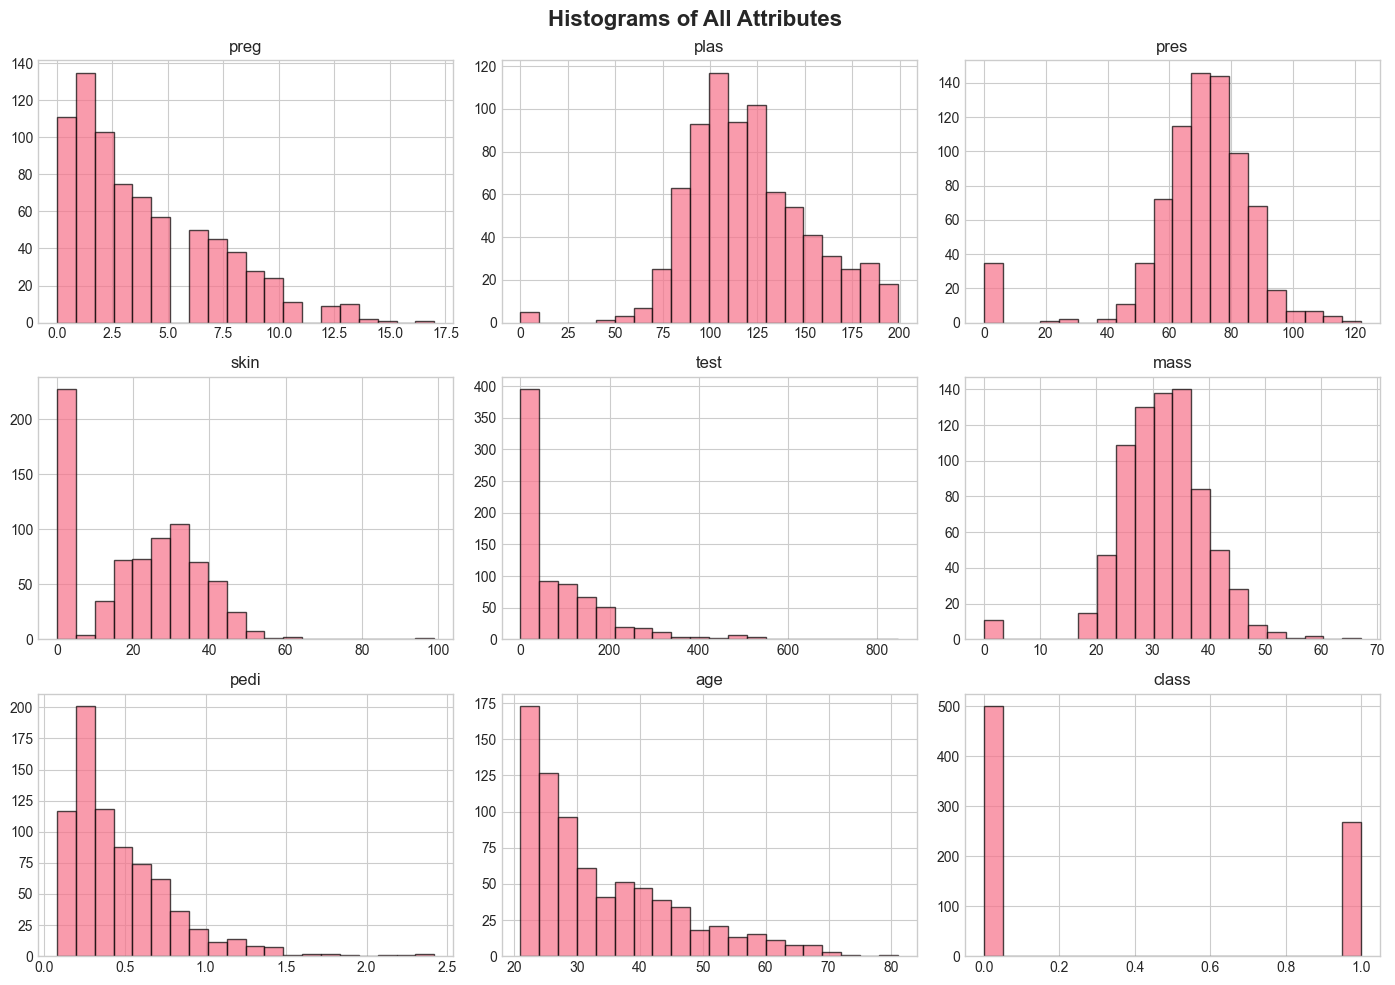

In [10]:
# Histograms
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
fig.suptitle('Histograms of All Attributes', fontsize=16, fontweight='bold')

data.hist(ax=axes.flatten(), bins=20, edgecolor='black', alpha=0.7)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

### 6.2 Density Plots

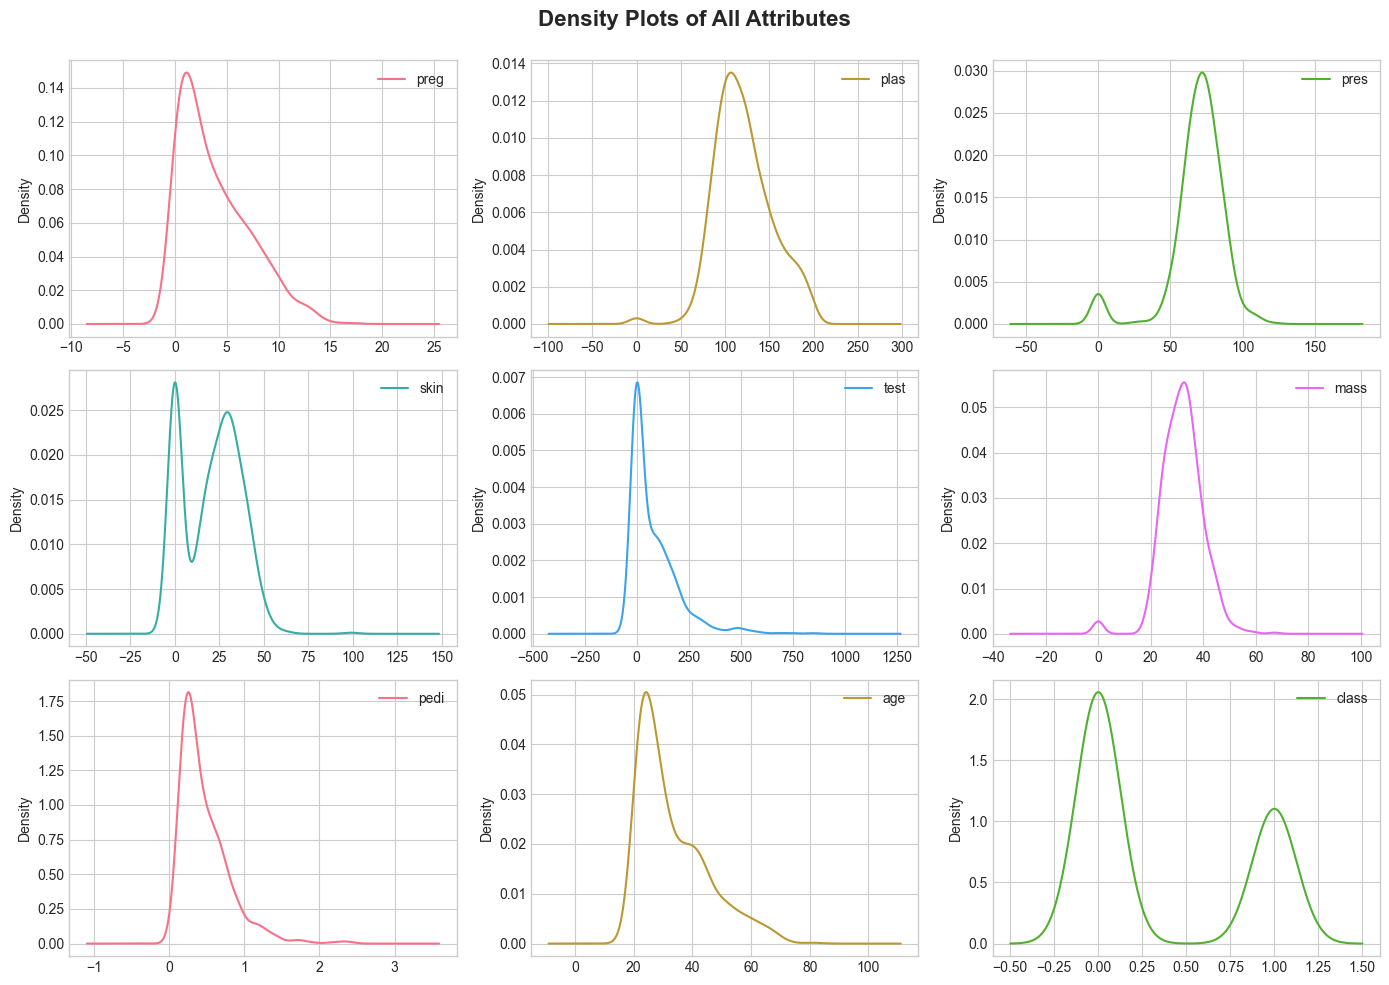

In [11]:
# Density Plots
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
fig.suptitle('Density Plots of All Attributes', fontsize=16, fontweight='bold')

data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, ax=axes.flatten())
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

### 6.3 Box and Whisker Plots

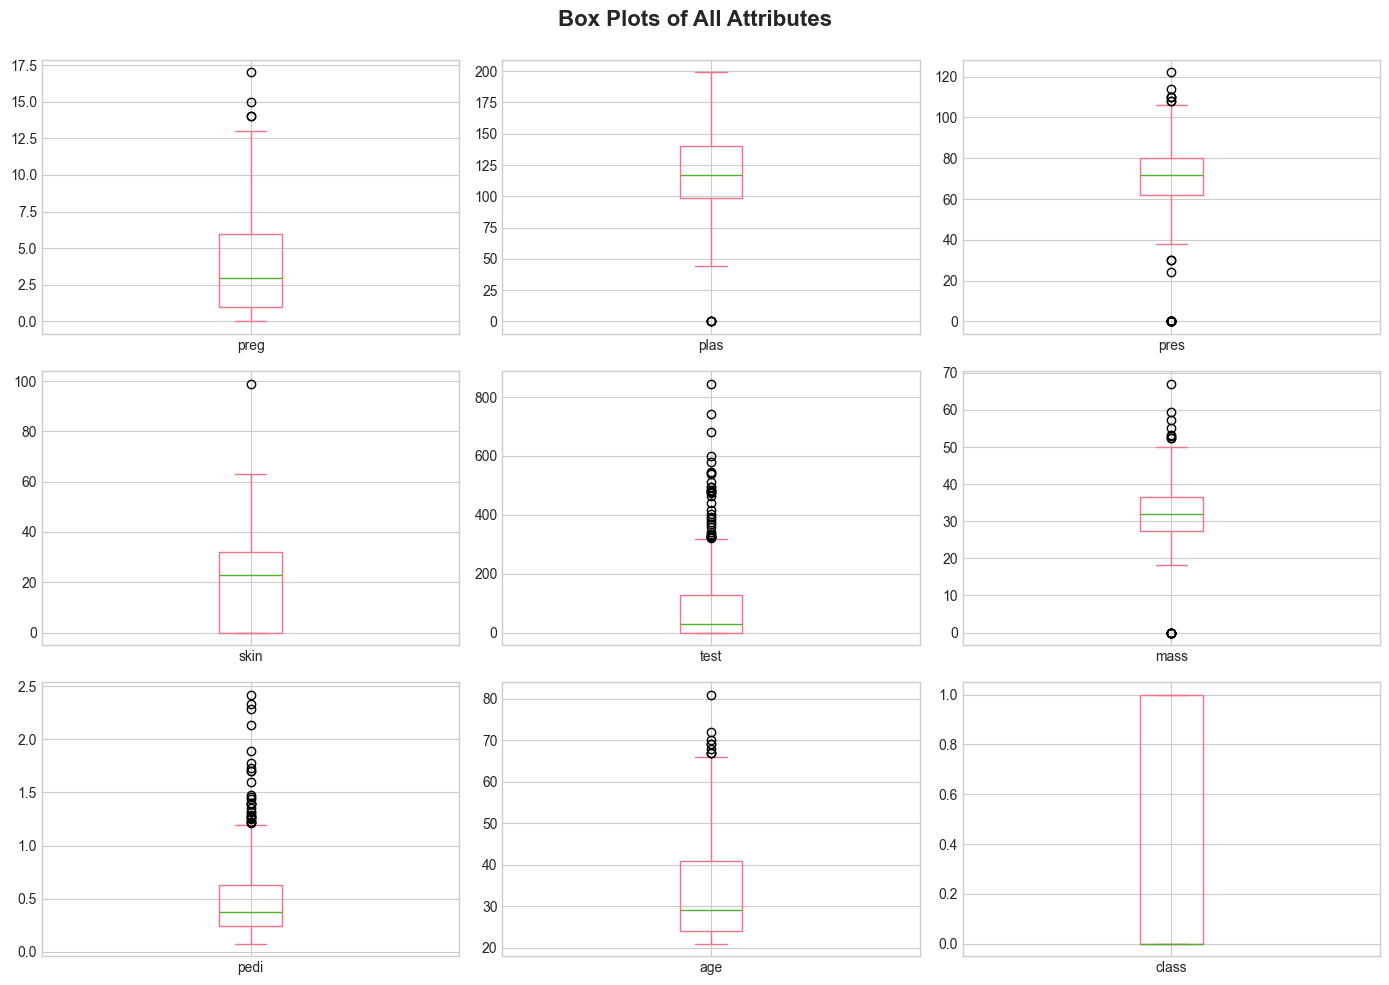

In [12]:
# Box and Whisker Plots
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
fig.suptitle('Box Plots of All Attributes', fontsize=16, fontweight='bold')

data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, ax=axes.flatten())
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

## 7. Data Visualization - Multivariate Plots

Understanding relationships between variables is crucial for feature engineering.

### 7.1 Correlation Matrix Heatmap

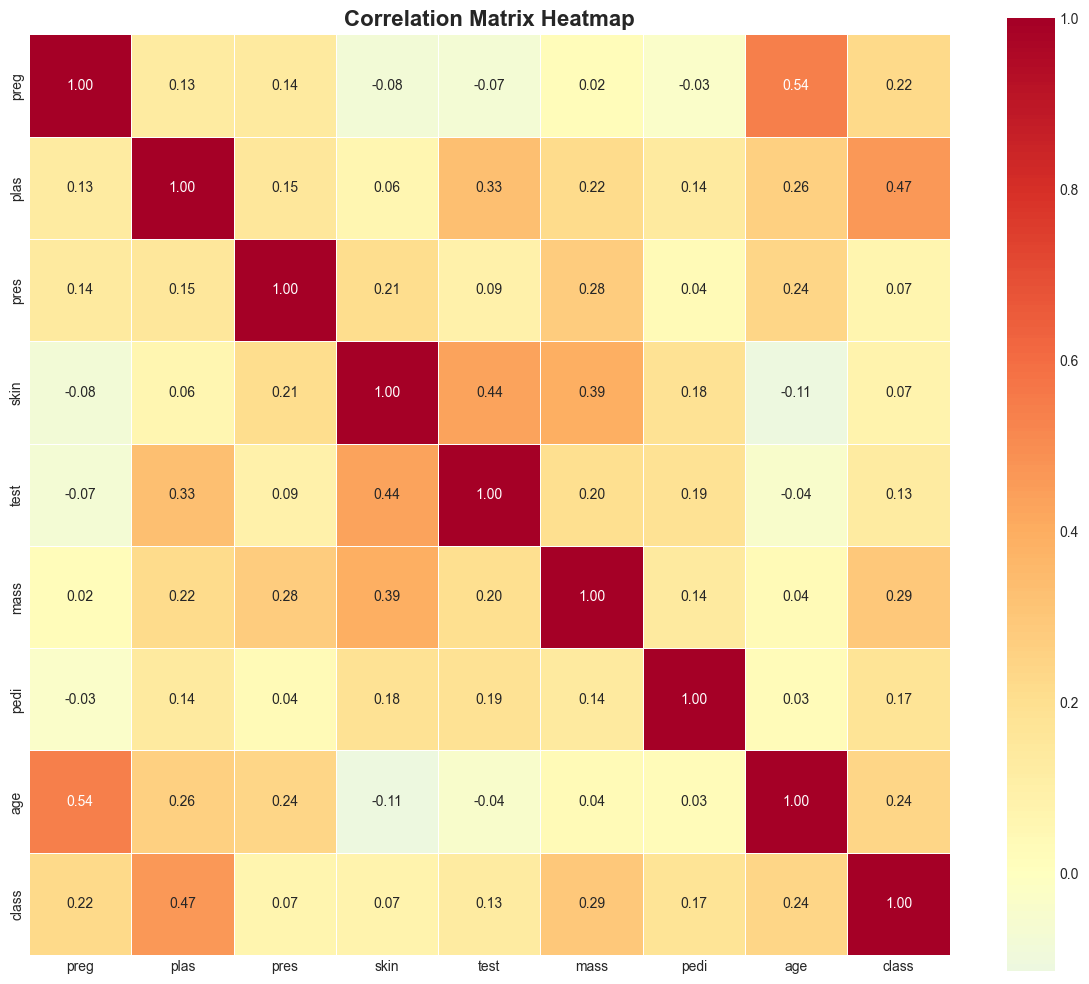

In [13]:
# Correlation Matrix Heatmap
fig, ax = plt.subplots(figsize=(12, 10))
correlations = data.corr()
sns.heatmap(correlations, annot=True, fmt='.2f', cmap='RdYlBu_r', 
            center=0, square=True, linewidths=0.5, ax=ax)
ax.set_title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 7.2 Scatter Plot Matrix

<Figure size 1500x1500 with 0 Axes>

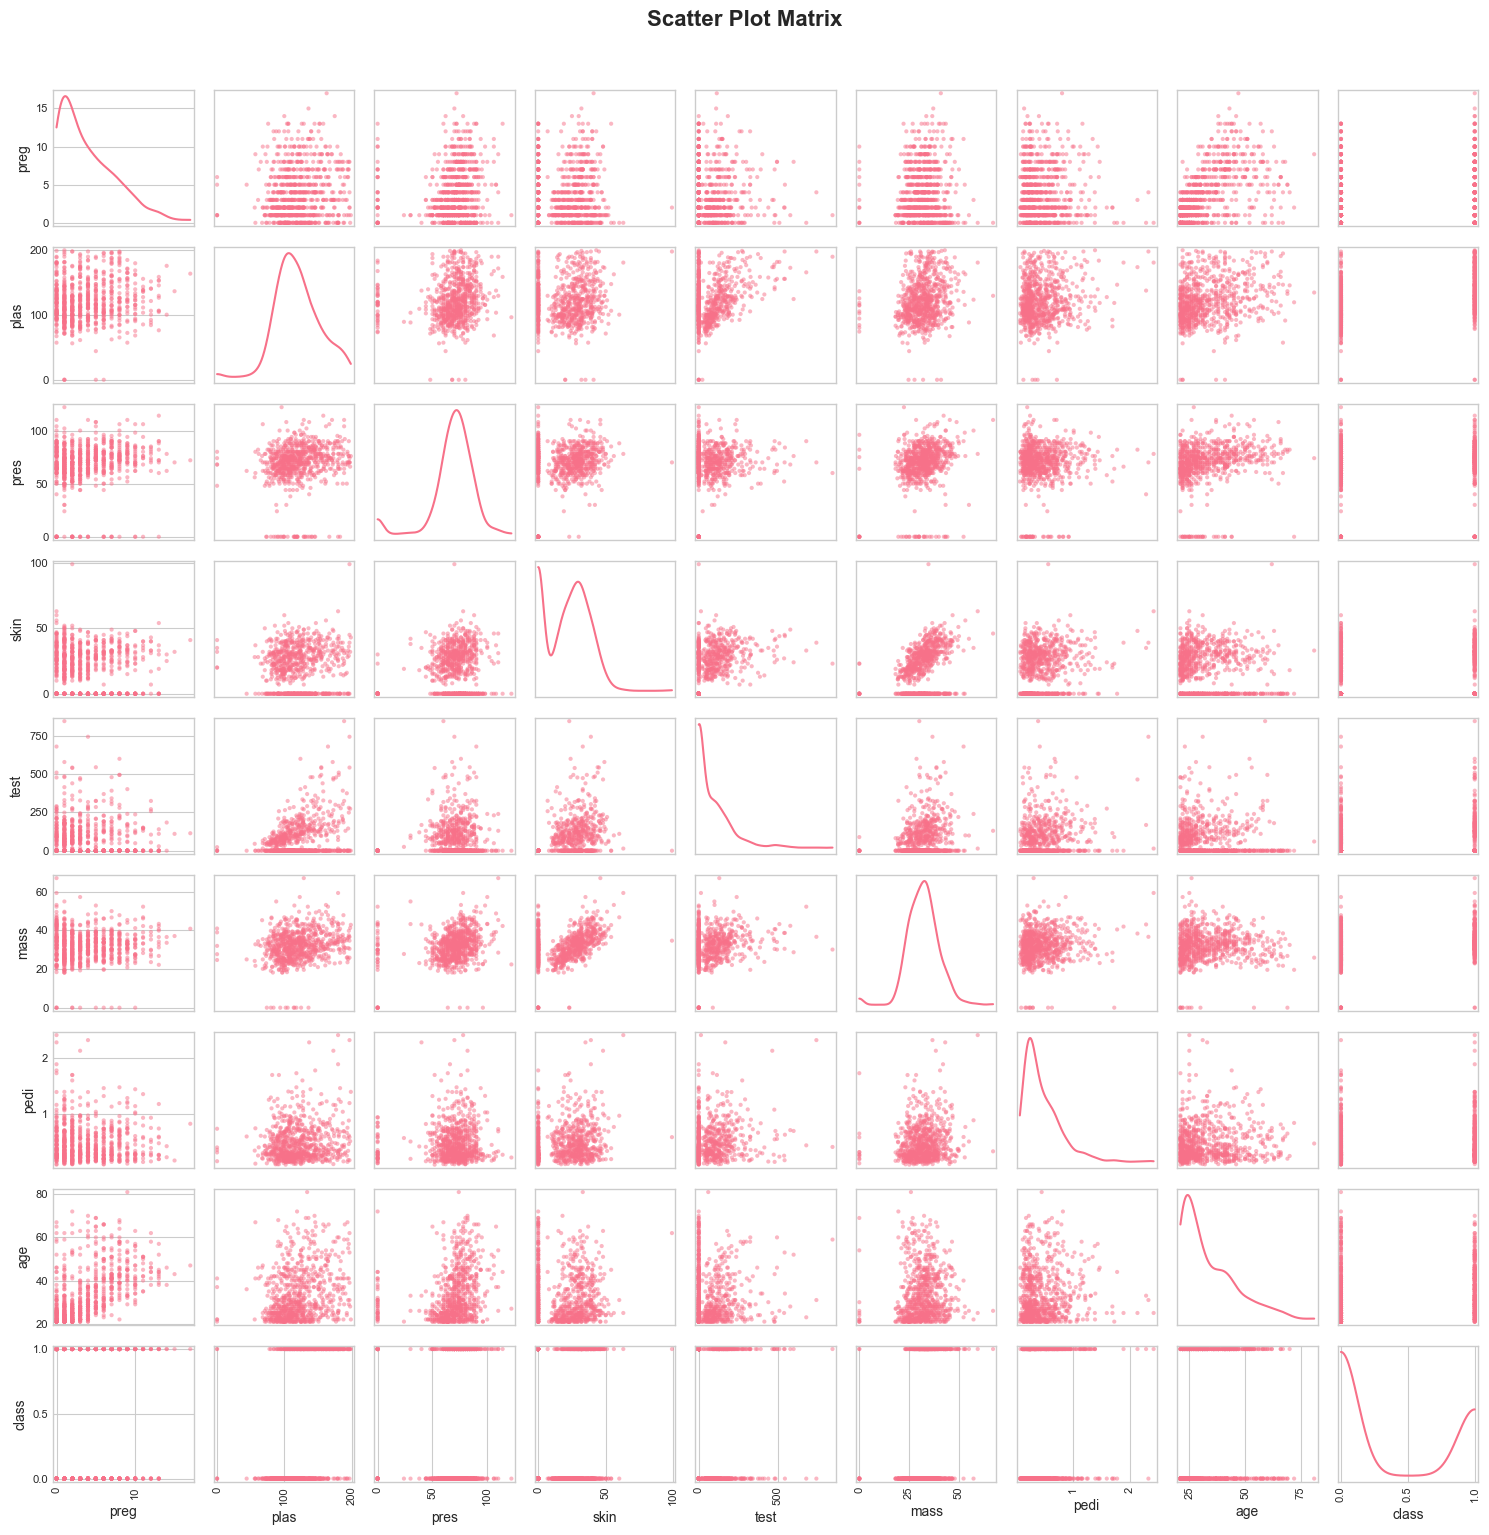

In [14]:
# Scatter Plot Matrix
fig = plt.figure(figsize=(15, 15))
scatter_matrix(data, alpha=0.5, figsize=(15, 15), diagonal='kde')
plt.suptitle('Scatter Plot Matrix', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
# PART II: DATA PREPROCESSING
---

## 8. Data Preprocessing - Rescaling (MinMax Scaler)

Rescaling attributes to a range between 0 and 1 is useful for algorithms that weight inputs (neural networks) or use distance measures (KNN).

In [15]:
# Rescale data (between 0 and 1)
from sklearn.preprocessing import MinMaxScaler

# Load data
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# Separate into input and output components
X = array[:, 0:8]
Y = array[:, 8]

# Apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# Summarize transformed data
np.set_printoptions(precision=3)
print("=" * 60)
print("RESCALED DATA (MinMaxScaler)")
print("=" * 60)
print(f"\nOriginal data range:")
print(f"Min: {X.min(axis=0)}")
print(f"Max: {X.max(axis=0)}")
print(f"\nRescaled data (first 5 rows):")
print(rescaledX[0:5, :])

RESCALED DATA (MinMaxScaler)

Original data range:
Min: [ 0.     0.     0.     0.     0.     0.     0.078 21.   ]
Max: [ 17.   199.   122.    99.   846.    67.1    2.42  81.  ]

Rescaled data (first 5 rows):
[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


## 9. Data Preprocessing - Standardization (Standard Scaler)

Standardization transforms data to have a mean of 0 and a standard deviation of 1. Useful for algorithms assuming Gaussian distribution (Linear Regression, Logistic Regression).

In [16]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler
scaler = StandardScaler().fit(X)
standardizedX = scaler.transform(X)

# Summarize transformed data
print("=" * 60)
print("STANDARDIZED DATA (StandardScaler)")
print("=" * 60)
print(f"\nOriginal data:")
print(f"Mean: {X.mean(axis=0).round(3)}")
print(f"Std:  {X.std(axis=0).round(3)}")
print(f"\nStandardized data:")
print(f"Mean: {standardizedX.mean(axis=0).round(3)}")
print(f"Std:  {standardizedX.std(axis=0).round(3)}")
print(f"\nStandardized data (first 5 rows):")
print(standardizedX[0:5, :])

STANDARDIZED DATA (StandardScaler)

Original data:
Mean: [  3.845 120.895  69.105  20.536  79.799  31.993   0.472  33.241]
Std:  [  3.367  31.952  19.343  15.942 115.169   7.879   0.331  11.753]

Standardized data:
Mean: [-0. -0.  0.  0. -0.  0.  0.  0.]
Std:  [1. 1. 1. 1. 1. 1. 1. 1.]

Standardized data (first 5 rows):
[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


## 10. Data Preprocessing - Normalization

Normalization rescales each observation to have a length of 1 (unit norm). Useful for sparse datasets with varying scales.

In [17]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer

# Apply Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# Summarize transformed data
print("=" * 60)
print("NORMALIZED DATA (Normalizer)")
print("=" * 60)
print(f"\nNormalized data (first 5 rows):")
print(normalizedX[0:5, :])

# Verify unit length
print(f"\nRow norms (should be 1.0):")
print(np.linalg.norm(normalizedX[0:5, :], axis=1))

NORMALIZED DATA (Normalizer)

Normalized data (first 5 rows):
[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]

Row norms (should be 1.0):
[1. 1. 1. 1. 1.]


## 11. Data Preprocessing - Binarization

Binarization transforms data using a binary threshold. All values above the threshold are 1, below are 0.

In [18]:
# Binarize data
from sklearn.preprocessing import Binarizer

# Apply Binarizer with threshold=0.0
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

# Summarize transformed data
print("=" * 60)
print("BINARIZED DATA (Binarizer, threshold=0.0)")
print("=" * 60)
print(f"\nBinarized data (first 5 rows):")
print(binaryX[0:5, :])

BINARIZED DATA (Binarizer, threshold=0.0)

Binarized data (first 5 rows):
[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


---
# PART III: FEATURE SELECTION
---

## 12. Feature Selection - Univariate Selection (Chi-Squared)

Statistical tests can select features that have the strongest relationship with the output variable. SelectKBest with chi-squared statistical test selects the top K features.

In [19]:
# Feature Selection with Univariate Statistical Tests (Chi-squared)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
print("=" * 60)
print("UNIVARIATE FEATURE SELECTION (Chi-Squared)")
print("=" * 60)

np.set_printoptions(precision=3)
print("\nChi-Squared Scores:")
for i, (name, score) in enumerate(zip(names[:-1], fit.scores_)):
    print(f"  {name}: {score:.3f}")

# Transform data to selected features
features = fit.transform(X)
print(f"\nSelected Features (first 5 rows):")
print(features[0:5, :])

UNIVARIATE FEATURE SELECTION (Chi-Squared)

Chi-Squared Scores:
  preg: 111.520
  plas: 1411.887
  pres: 17.605
  skin: 53.108
  test: 2175.565
  mass: 127.669
  pedi: 5.393
  age: 181.304

Selected Features (first 5 rows):
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


## 13. Feature Selection - Recursive Feature Elimination (RFE)

RFE works by recursively removing attributes and building a model on remaining attributes. It uses model accuracy to identify which attributes contribute most.

In [20]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression(solver='liblinear', max_iter=1000)
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)

print("=" * 60)
print("RECURSIVE FEATURE ELIMINATION (RFE)")
print("=" * 60)

print(f"\nNumber of Features Selected: {fit.n_features_}")
print("\nFeature Selection Results:")
print("-" * 40)
for i, (name, selected, rank) in enumerate(zip(names[:-1], fit.support_, fit.ranking_)):
    status = "SELECTED" if selected else f"Rank: {rank}"
    print(f"  {name}: {status}")

RECURSIVE FEATURE ELIMINATION (RFE)

Number of Features Selected: 3

Feature Selection Results:
----------------------------------------
  preg: SELECTED
  plas: Rank: 2
  pres: Rank: 3
  skin: Rank: 5
  test: Rank: 6
  mass: SELECTED
  pedi: SELECTED
  age: Rank: 4


## 14. Feature Selection - Principal Component Analysis (PCA)

PCA uses linear algebra to transform the dataset into a compressed form. It's a data reduction technique that creates new attributes (principal components) that better summarize the data.

In [21]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA

# Feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)

print("=" * 60)
print("PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("=" * 60)

print(f"\nExplained Variance Ratio: {fit.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(fit.explained_variance_ratio_)*100:.2f}%")
print(f"\nPrincipal Components:")
print(fit.components_)

# Transform data
transformed = pca.transform(X)
print(f"\nTransformed Data (first 5 rows):")
print(transformed[0:5, :])

PRINCIPAL COMPONENT ANALYSIS (PCA)

Explained Variance Ratio: [0.889 0.062 0.026]
Total Variance Explained: 97.59%

Principal Components:
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [ 2.265e-02  9.722e-01  1.419e-01 -5.786e-02 -9.463e-02  4.697e-02
   8.168e-04  1.402e-01]
 [ 2.246e-02 -1.434e-01  9.225e-01  3.070e-01 -2.098e-02  1.324e-01
   6.400e-04  1.255e-01]]

Transformed Data (first 5 rows):
[[-7.571e+01  3.595e+01  7.261e+00]
 [-8.236e+01 -2.891e+01  5.497e+00]
 [-7.463e+01  6.791e+01 -1.946e+01]
 [ 1.108e+01 -3.490e+01  5.302e-02]
 [ 8.974e+01  2.747e+00 -2.521e+01]]


## 15. Feature Selection - Feature Importance with Extra Trees

Bagged decision trees like Random Forest and Extra Trees can estimate the importance of features. The higher the score, the more important the attribute.

FEATURE IMPORTANCE (Extra Trees Classifier)

Feature Importance Scores:
----------------------------------------
  1. plas: 0.2298
  2. age: 0.1446
  3. mass: 0.1445
  4. pedi: 0.1174
  5. preg: 0.1075
  6. pres: 0.0991
  7. skin: 0.0790
  8. test: 0.0780


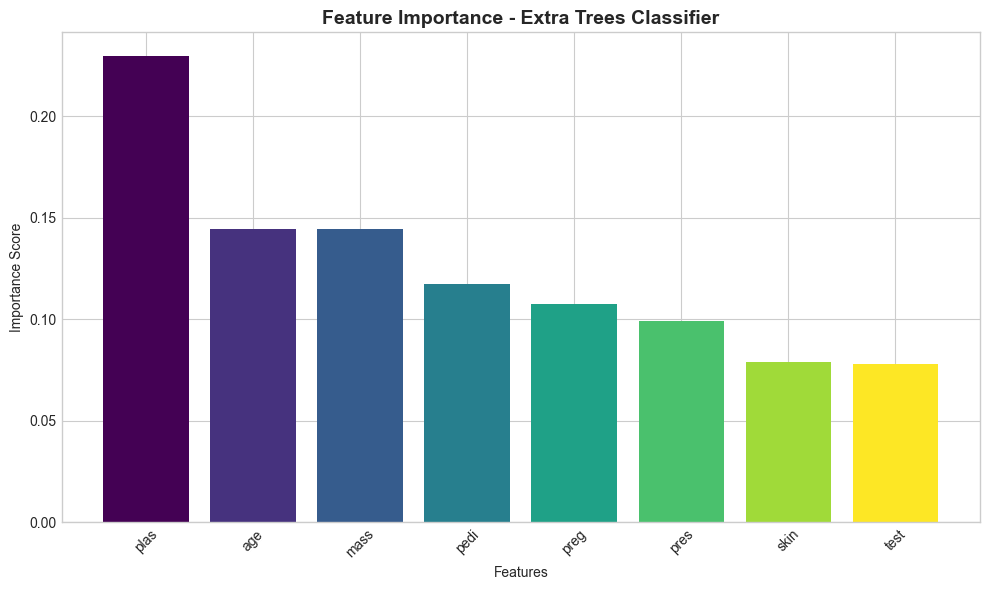

In [22]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# Feature extraction
model = ExtraTreesClassifier(n_estimators=100, random_state=7)
model.fit(X, Y)

print("=" * 60)
print("FEATURE IMPORTANCE (Extra Trees Classifier)")
print("=" * 60)

# Display feature importance
print("\nFeature Importance Scores:")
print("-" * 40)
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]

for i, idx in enumerate(indices):
    print(f"  {i+1}. {names[idx]}: {importance[idx]:.4f}")

# Visualize feature importance
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(names[:-1])))
bars = ax.bar(range(len(importance)), importance[indices], color=colors)
ax.set_xticks(range(len(importance)))
ax.set_xticklabels([names[i] for i in indices], rotation=45)
ax.set_title('Feature Importance - Extra Trees Classifier', fontsize=14, fontweight='bold')
ax.set_xlabel('Features')
ax.set_ylabel('Importance Score')
plt.tight_layout()
plt.show()

---
# PART IV: MODEL EVALUATION
---

## 16. Resampling Methods - Train/Test Split

The simplest method to evaluate model performance is to split the dataset into training and test sets.

In [23]:
# Evaluate using a train and test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split into 67% training and 33% test
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Train model
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, Y_train)

# Evaluate
result = model.score(X_test, Y_test)

print("=" * 60)
print("TRAIN/TEST SPLIT EVALUATION")
print("=" * 60)
print(f"\nTest Size: {test_size*100:.0f}%")
print(f"Training Set Size: {len(X_train)}")
print(f"Test Set Size: {len(X_test)}")
print(f"\nAccuracy: {result*100:.3f}%")

TRAIN/TEST SPLIT EVALUATION

Test Size: 33%
Training Set Size: 514
Test Set Size: 254

Accuracy: 75.591%


## 17. Resampling Methods - K-Fold Cross Validation

K-Fold Cross Validation splits the dataset into K parts, trains on K-1, and tests on the remaining part. This process is repeated K times, providing a more robust estimate of model performance.

In [24]:
# Evaluate using Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K-Fold Cross Validation
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = LogisticRegression(solver='liblinear', max_iter=1000)
results = cross_val_score(model, X, Y, cv=kfold)

print("=" * 60)
print("K-FOLD CROSS VALIDATION")
print("=" * 60)
print(f"\nNumber of Folds: {num_folds}")
print(f"\nResults for each fold:")
for i, score in enumerate(results):
    print(f"  Fold {i+1}: {score*100:.3f}%")
print(f"\nMean Accuracy: {results.mean()*100:.3f}%")
print(f"Standard Deviation: {results.std()*100:.3f}%")

K-FOLD CROSS VALIDATION

Number of Folds: 10

Results for each fold:
  Fold 1: 83.117%
  Fold 2: 71.429%
  Fold 3: 71.429%
  Fold 4: 77.922%
  Fold 5: 79.221%
  Fold 6: 76.623%
  Fold 7: 68.831%
  Fold 8: 85.714%
  Fold 9: 80.263%
  Fold 10: 76.316%

Mean Accuracy: 77.086%
Standard Deviation: 5.091%


## 18. Resampling Methods - Leave One Out Cross Validation (LOOCV)

LOOCV uses a single observation from the original sample as validation data, with the remaining observations as training data. This is repeated such that each observation is used once as validation.

In [25]:
# Evaluate using Leave One Out Cross Validation
from sklearn.model_selection import LeaveOneOut

loocv = LeaveOneOut()
model = LogisticRegression(solver='liblinear', max_iter=1000)
results = cross_val_score(model, X, Y, cv=loocv)

print("=" * 60)
print("LEAVE ONE OUT CROSS VALIDATION (LOOCV)")
print("=" * 60)
print(f"\nNumber of Iterations: {len(results)}")
print(f"Mean Accuracy: {results.mean()*100:.3f}%")
print(f"Standard Deviation: {results.std()*100:.3f}%")

LEAVE ONE OUT CROSS VALIDATION (LOOCV)

Number of Iterations: 768
Mean Accuracy: 76.823%
Standard Deviation: 42.196%


## 19. Resampling Methods - Repeated Random Test-Train Splits (Shuffle Split)

ShuffleSplit creates random train/test splits multiple times, providing a compromise between K-Fold and LOOCV.

In [26]:
# Evaluate using Shuffle Split Cross Validation
from sklearn.model_selection import ShuffleSplit

n_splits = 10
test_size = 0.33
seed = 7

kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear', max_iter=1000)
results = cross_val_score(model, X, Y, cv=kfold)

print("=" * 60)
print("REPEATED RANDOM TEST-TRAIN SPLITS (ShuffleSplit)")
print("=" * 60)
print(f"\nNumber of Splits: {n_splits}")
print(f"Test Size: {test_size*100:.0f}%")
print(f"\nResults for each split:")
for i, score in enumerate(results):
    print(f"  Split {i+1}: {score*100:.3f}%")
print(f"\nMean Accuracy: {results.mean()*100:.3f}%")
print(f"Standard Deviation: {results.std()*100:.3f}%")

REPEATED RANDOM TEST-TRAIN SPLITS (ShuffleSplit)

Number of Splits: 10
Test Size: 33%

Results for each split:
  Split 1: 75.591%
  Split 2: 75.197%
  Split 3: 78.346%
  Split 4: 76.772%
  Split 5: 76.378%
  Split 6: 78.346%
  Split 7: 75.197%
  Split 8: 79.528%
  Split 9: 75.984%
  Split 10: 73.622%

Mean Accuracy: 76.496%
Standard Deviation: 1.698%


## 20. Classification Performance Metrics

Different metrics are used to evaluate classification model performance.

### 20.1 Classification Accuracy

In [27]:
# Cross Validation Classification Accuracy
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = LogisticRegression(solver='liblinear', max_iter=1000)
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("=" * 60)
print("CLASSIFICATION ACCURACY")
print("=" * 60)
print(f"\nAccuracy: {results.mean()*100:.3f}% (+/- {results.std()*100:.3f}%)")

CLASSIFICATION ACCURACY

Accuracy: 77.086% (+/- 5.091%)


### 20.2 Logarithmic Loss (Log Loss)

In [28]:
# Cross Validation Classification LogLoss
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("=" * 60)
print("LOGARITHMIC LOSS (Log Loss)")
print("=" * 60)
print(f"\nLog Loss: {-results.mean():.3f} (+/- {results.std():.3f})")
print("\nNote: Lower is better for Log Loss")

LOGARITHMIC LOSS (Log Loss)

Log Loss: 0.494 (+/- 0.042)

Note: Lower is better for Log Loss


### 20.3 Area Under ROC Curve (AUC)

In [29]:
# Cross Validation Classification ROC AUC
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("=" * 60)
print("AREA UNDER ROC CURVE (AUC)")
print("=" * 60)
print(f"\nAUC: {results.mean():.3f} (+/- {results.std():.3f})")
print("\nNote: AUC closer to 1.0 is better")

AREA UNDER ROC CURVE (AUC)

AUC: 0.826 (+/- 0.050)

Note: AUC closer to 1.0 is better


### 20.4 Confusion Matrix

CONFUSION MATRIX

[[141  21]
 [ 41  51]]


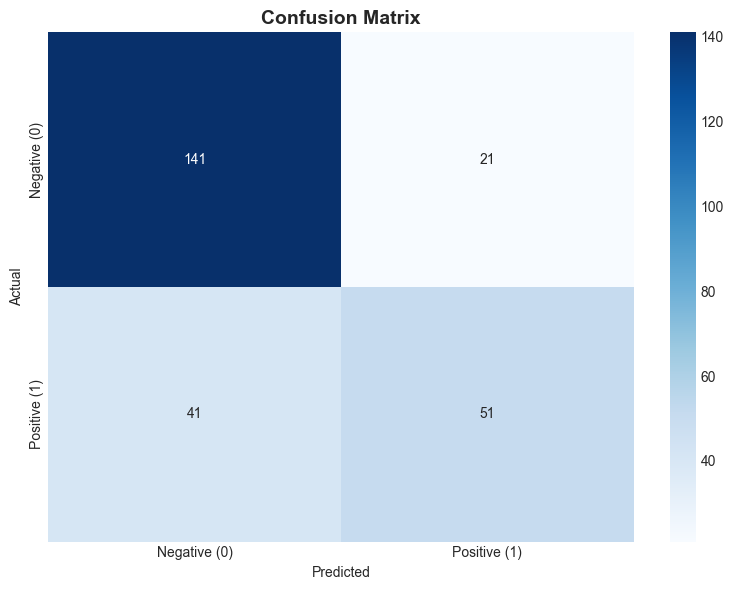


True Negatives: 141
False Positives: 21
False Negatives: 41
True Positives: 51

Accuracy: 75.59%
Precision: 70.83%
Recall: 55.43%


In [30]:
# Cross Validation Classification Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

matrix = confusion_matrix(Y_test, predicted)

print("=" * 60)
print("CONFUSION MATRIX")
print("=" * 60)
print(f"\n{matrix}")

# Visualize confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'], ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate metrics from confusion matrix
tn, fp, fn, tp = matrix.ravel()
print(f"\nTrue Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"\nAccuracy: {(tp+tn)/(tp+tn+fp+fn)*100:.2f}%")
print(f"Precision: {tp/(tp+fp)*100:.2f}%")
print(f"Recall: {tp/(tp+fn)*100:.2f}%")

### 20.5 Classification Report

In [31]:
# Classification Report
print("=" * 60)
print("CLASSIFICATION REPORT")
print("=" * 60)
report = classification_report(Y_test, predicted, target_names=['No Diabetes', 'Diabetes'])
print(f"\n{report}")

CLASSIFICATION REPORT

              precision    recall  f1-score   support

 No Diabetes       0.77      0.87      0.82       162
    Diabetes       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



## 21. Regression Performance Metrics

Different metrics are used to evaluate regression model performance. We'll use the Boston Housing dataset for this section.

In [32]:
# Load Boston Housing Dataset
from sklearn.linear_model import LinearRegression

# Download Boston Housing dataset
url_housing = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
urllib.request.urlretrieve(url_housing, "housing.csv")

# Load data
names_housing = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe_housing = read_csv("housing.csv", delim_whitespace=True, names=names_housing)
array_housing = dataframe_housing.values
X_housing = array_housing[:, 0:13]
Y_housing = array_housing[:, 13]

print("=" * 60)
print("BOSTON HOUSING DATASET LOADED")
print("=" * 60)
print(f"\nShape: {dataframe_housing.shape}")
print(f"\nFirst 5 rows:")
print(dataframe_housing.head())

BOSTON HOUSING DATASET LOADED

Shape: (506, 14)

First 5 rows:
    CRIM    ZN  INDUS  CHAS    NOX     RM   AGE    DIS  RAD    TAX  PTRATIO       B  LSTAT  MEDV
0  0.006  18.0   2.31     0  0.538  6.575  65.2  4.090    1  296.0     15.3  396.90   4.98  24.0
1  0.027   0.0   7.07     0  0.469  6.421  78.9  4.967    2  242.0     17.8  396.90   9.14  21.6
2  0.027   0.0   7.07     0  0.469  7.185  61.1  4.967    2  242.0     17.8  392.83   4.03  34.7
3  0.032   0.0   2.18     0  0.458  6.998  45.8  6.062    3  222.0     18.7  394.63   2.94  33.4
4  0.069   0.0   2.18     0  0.458  7.147  54.2  6.062    3  222.0     18.7  396.90   5.33  36.2


### 21.1 Mean Absolute Error (MAE)

In [33]:
# Cross Validation Regression MAE
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X_housing, Y_housing, cv=kfold, scoring=scoring)

print("=" * 60)
print("MEAN ABSOLUTE ERROR (MAE)")
print("=" * 60)
print(f"\nMAE: {-results.mean():.3f} (+/- {results.std():.3f})")
print("\nNote: Lower MAE is better")

MEAN ABSOLUTE ERROR (MAE)

MAE: 3.387 (+/- 0.667)

Note: Lower MAE is better


### 21.2 Mean Squared Error (MSE)

In [34]:
# Cross Validation Regression MSE
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X_housing, Y_housing, cv=kfold, scoring=scoring)

print("=" * 60)
print("MEAN SQUARED ERROR (MSE)")
print("=" * 60)
print(f"\nMSE: {-results.mean():.3f} (+/- {results.std():.3f})")
print(f"RMSE: {np.sqrt(-results.mean()):.3f}")
print("\nNote: Lower MSE/RMSE is better")

MEAN SQUARED ERROR (MSE)

MSE: 23.747 (+/- 11.143)
RMSE: 4.873

Note: Lower MSE/RMSE is better


### 21.3 R-Squared (R²)

In [35]:
# Cross Validation Regression R^2
scoring = 'r2'
results = cross_val_score(model, X_housing, Y_housing, cv=kfold, scoring=scoring)

print("=" * 60)
print("R-SQUARED (R²)")
print("=" * 60)
print(f"\nR²: {results.mean():.3f} (+/- {results.std():.3f})")
print("\nNote: R² closer to 1.0 is better (explains more variance)")

R-SQUARED (R²)

R²: 0.718 (+/- 0.099)

Note: R² closer to 1.0 is better (explains more variance)


---
# PART V: MACHINE LEARNING ALGORITHMS
---

## 22. Spot-Check Classification Algorithms

Spot-checking is a way of discovering which algorithms perform well on your problem. We compare multiple classification algorithms to find the best performers.

In [36]:
# Import Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Prepare data for classification
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

print("=" * 60)
print("SPOT-CHECK CLASSIFICATION ALGORITHMS")
print("=" * 60)
print("\nDataset: Pima Indians Diabetes")
print(f"Features: {X.shape[1]}, Samples: {X.shape[0]}")

SPOT-CHECK CLASSIFICATION ALGORITHMS

Dataset: Pima Indians Diabetes
Features: 8, Samples: 768


### 22.1 Logistic Regression

In [37]:
# Logistic Regression Classification
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = LogisticRegression(solver='liblinear', max_iter=1000)
results = cross_val_score(model, X, Y, cv=kfold)

print("=" * 60)
print("LOGISTIC REGRESSION")
print("=" * 60)
print(f"\nAccuracy: {results.mean()*100:.3f}% (+/- {results.std()*100:.3f}%)")

LOGISTIC REGRESSION

Accuracy: 77.086% (+/- 5.091%)


### 22.2 Linear Discriminant Analysis (LDA)

In [38]:
# LDA Classification
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)

print("=" * 60)
print("LINEAR DISCRIMINANT ANALYSIS (LDA)")
print("=" * 60)
print(f"\nAccuracy: {results.mean()*100:.3f}% (+/- {results.std()*100:.3f}%)")

LINEAR DISCRIMINANT ANALYSIS (LDA)

Accuracy: 76.697% (+/- 4.797%)


### 22.3 K-Nearest Neighbors (KNN)

In [39]:
# KNN Classification
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)

print("=" * 60)
print("K-NEAREST NEIGHBORS (KNN)")
print("=" * 60)
print(f"\nAccuracy: {results.mean()*100:.3f}% (+/- {results.std()*100:.3f}%)")

K-NEAREST NEIGHBORS (KNN)

Accuracy: 71.099% (+/- 5.079%)


### 22.4 Naive Bayes (Gaussian)

In [40]:
# Naive Bayes Classification
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)

print("=" * 60)
print("NAIVE BAYES (Gaussian)")
print("=" * 60)
print(f"\nAccuracy: {results.mean()*100:.3f}% (+/- {results.std()*100:.3f}%)")

NAIVE BAYES (Gaussian)

Accuracy: 75.914% (+/- 3.896%)


### 22.5 Classification and Regression Trees (CART)

In [41]:
# Decision Tree Classification (CART)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)

print("=" * 60)
print("CLASSIFICATION AND REGRESSION TREES (CART)")
print("=" * 60)
print(f"\nAccuracy: {results.mean()*100:.3f}% (+/- {results.std()*100:.3f}%)")

CLASSIFICATION AND REGRESSION TREES (CART)

Accuracy: 69.412% (+/- 4.699%)


### 22.6 Support Vector Machines (SVM)

In [42]:
# SVM Classification
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)

print("=" * 60)
print("SUPPORT VECTOR MACHINES (SVM)")
print("=" * 60)
print(f"\nAccuracy: {results.mean()*100:.3f}% (+/- {results.std()*100:.3f}%)")

SUPPORT VECTOR MACHINES (SVM)

Accuracy: 76.046% (+/- 3.471%)


## 23. Spot-Check Regression Algorithms

We compare multiple regression algorithms using the Boston Housing dataset.

In [43]:
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Prepare regression models
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Evaluate each model
print("=" * 60)
print("SPOT-CHECK REGRESSION ALGORITHMS")
print("=" * 60)
print("\nDataset: Boston Housing")
print(f"Features: {X_housing.shape[1]}, Samples: {X_housing.shape[0]}")
print("\n" + "-" * 60)
print(f"{'Algorithm':<15} {'MSE':>15} {'Std':>15}")
print("-" * 60)

results_reg = []
names_reg = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_housing, Y_housing, cv=kfold, scoring='neg_mean_squared_error')
    results_reg.append(cv_results)
    names_reg.append(name)
    print(f"{name:<15} {-cv_results.mean():>15.3f} {cv_results.std():>15.3f}")

print("-" * 60)

SPOT-CHECK REGRESSION ALGORITHMS

Dataset: Boston Housing
Features: 13, Samples: 506

------------------------------------------------------------
Algorithm                   MSE             Std
------------------------------------------------------------
LR                       23.747          11.143
Ridge                    23.890          11.407
Lasso                    28.746          12.002
ElasticNet               27.908          11.484
KNN                      38.852          14.661
CART                     21.162           9.107
SVR                      67.641          26.525
------------------------------------------------------------


## 24. Compare Machine Learning Algorithms

A systematic comparison of multiple algorithms allows us to identify the best performers for our problem.

COMPARE CLASSIFICATION ALGORITHMS

------------------------------------------------------------
Algorithm              Accuracy             Std
------------------------------------------------------------
LR                      77.086%          5.091%
LDA                     76.697%          4.797%
KNN                     71.099%          5.079%
CART                    69.675%          5.599%
NB                      75.914%          3.896%
SVM                     76.046%          3.471%
------------------------------------------------------------


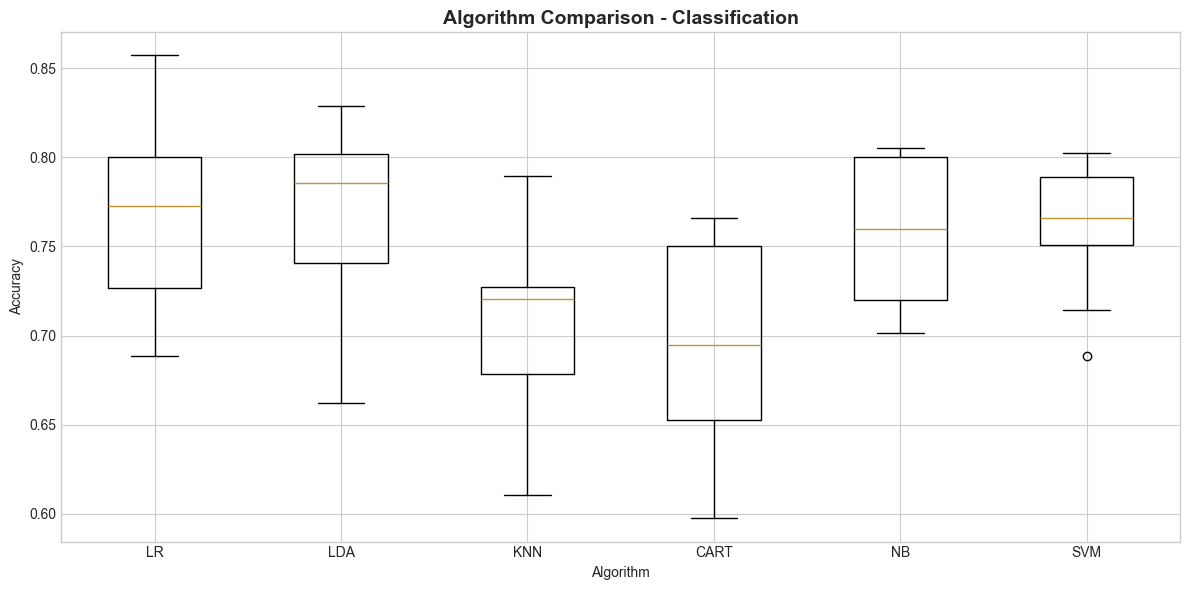

In [44]:
# Compare Algorithms for Classification
models_clf = []
models_clf.append(('LR', LogisticRegression(solver='liblinear', max_iter=1000)))
models_clf.append(('LDA', LinearDiscriminantAnalysis()))
models_clf.append(('KNN', KNeighborsClassifier()))
models_clf.append(('CART', DecisionTreeClassifier()))
models_clf.append(('NB', GaussianNB()))
models_clf.append(('SVM', SVC()))

# Evaluate each model
print("=" * 60)
print("COMPARE CLASSIFICATION ALGORITHMS")
print("=" * 60)
print("\n" + "-" * 60)
print(f"{'Algorithm':<15} {'Accuracy':>15} {'Std':>15}")
print("-" * 60)

results_clf = []
names_clf = []
for name, model in models_clf:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results_clf.append(cv_results)
    names_clf.append(name)
    print(f"{name:<15} {cv_results.mean()*100:>14.3f}% {cv_results.std()*100:>14.3f}%")

print("-" * 60)

# Boxplot comparison
fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(results_clf, labels=names_clf)
ax.set_title('Algorithm Comparison - Classification', fontsize=14, fontweight='bold')
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
plt.tight_layout()
plt.show()

---
# PART VI: ADVANCED TECHNIQUES
---

## 25. Pipelines - Data Preparation and Modeling

Pipelines help automate machine learning workflows by chaining multiple steps together.

PIPELINES: DATA PREPARATION + MODELING

------------------------------------------------------------
Pipeline               Accuracy             Std
------------------------------------------------------------
ScaledLR                77.216%          4.760%
ScaledLDA               76.697%          4.797%
ScaledKNN               73.966%          5.128%
ScaledCART              69.412%          5.705%
ScaledNB                75.914%          3.896%
ScaledSVM               75.654%          5.622%
------------------------------------------------------------
ScaledSVM               75.654%          5.622%
------------------------------------------------------------


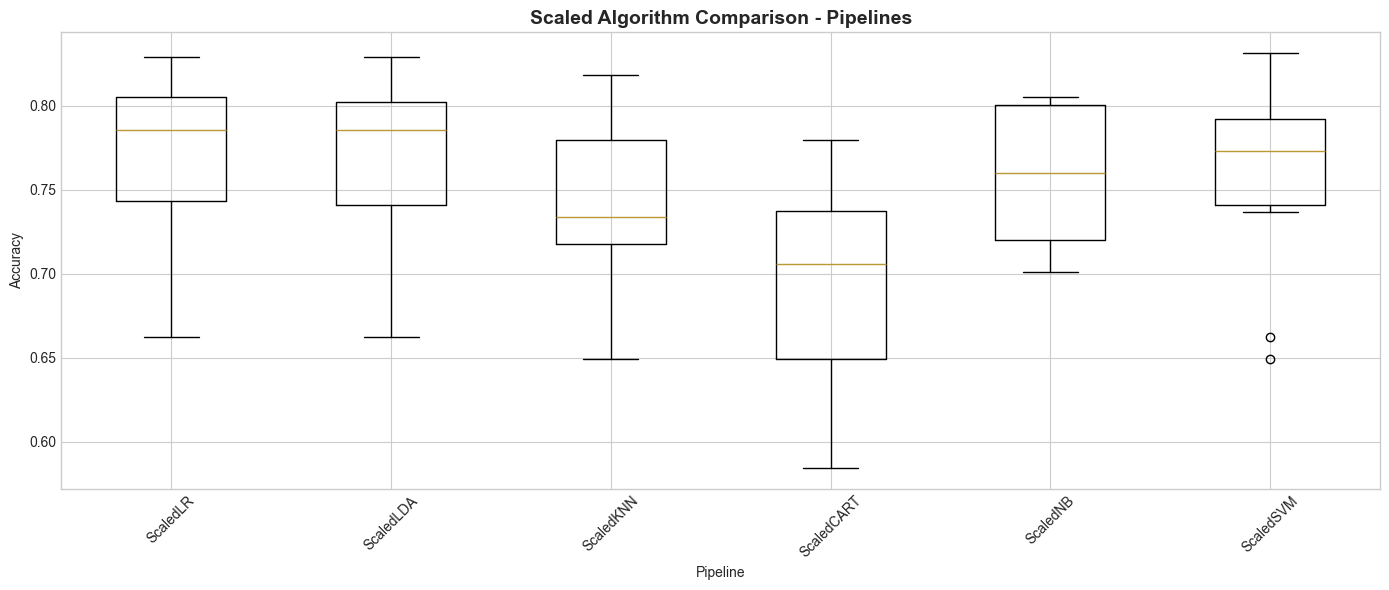

In [45]:
# Create a pipeline that standardizes the data then creates a model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create pipeline
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

print("=" * 60)
print("PIPELINES: DATA PREPARATION + MODELING")
print("=" * 60)
print("\n" + "-" * 60)
print(f"{'Pipeline':<15} {'Accuracy':>15} {'Std':>15}")
print("-" * 60)

results_pipe = []
names_pipe = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results_pipe.append(cv_results)
    names_pipe.append(name)
    print(f"{name:<15} {cv_results.mean()*100:>14.3f}% {cv_results.std()*100:>14.3f}%")

print("-" * 60)

# Boxplot comparison
fig, ax = plt.subplots(figsize=(14, 6))
ax.boxplot(results_pipe, labels=names_pipe)
ax.set_title('Scaled Algorithm Comparison - Pipelines', fontsize=14, fontweight='bold')
ax.set_xlabel('Pipeline')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 26. Pipelines - Feature Extraction and Modeling

Combining PCA feature extraction with modeling in a pipeline.

In [46]:
# Create a pipeline with feature extraction
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# Create pipelines with feature extraction
feature_pipelines = []
feature_pipelines.append(('PCA+LR', Pipeline([
    ('Scaler', StandardScaler()), 
    ('PCA', PCA(n_components=5)), 
    ('LR', LogisticRegression(solver='liblinear'))
])))
feature_pipelines.append(('SelectKBest+LR', Pipeline([
    ('SelectKBest', SelectKBest(k=5)), 
    ('LR', LogisticRegression(solver='liblinear'))
])))

print("=" * 60)
print("PIPELINES: FEATURE EXTRACTION + MODELING")
print("=" * 60)
print("\n" + "-" * 60)
print(f"{'Pipeline':<20} {'Accuracy':>15} {'Std':>15}")
print("-" * 60)

for name, model in feature_pipelines:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    print(f"{name:<20} {cv_results.mean()*100:>14.3f}% {cv_results.std()*100:>14.3f}%")

print("-" * 60)

PIPELINES: FEATURE EXTRACTION + MODELING

------------------------------------------------------------
Pipeline                    Accuracy             Std
------------------------------------------------------------
PCA+LR                       74.093%          5.158%
SelectKBest+LR               77.216%          4.025%
------------------------------------------------------------


## 27. Ensemble Methods - Bagging (Bootstrap Aggregating)

Bagging creates multiple models from different subsamples of the training dataset. Bagged Decision Trees and Random Forest are two popular bagging methods.

In [47]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

print("=" * 60)
print("ENSEMBLE METHODS - BAGGING")
print("=" * 60)

# Bagged Decision Trees
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(f"\n1. Bagged Decision Trees")
print(f"   Accuracy: {results.mean()*100:.3f}% (+/- {results.std()*100:.3f}%)")

# Random Forest
model = RandomForestClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(f"\n2. Random Forest")
print(f"   Accuracy: {results.mean()*100:.3f}% (+/- {results.std()*100:.3f}%)")

# Extra Trees
model = ExtraTreesClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(f"\n3. Extra Trees")
print(f"   Accuracy: {results.mean()*100:.3f}% (+/- {results.std()*100:.3f}%)")

ENSEMBLE METHODS - BAGGING

1. Bagged Decision Trees
   Accuracy: 75.783% (+/- 3.855%)

1. Bagged Decision Trees
   Accuracy: 75.783% (+/- 3.855%)

2. Random Forest
   Accuracy: 77.215% (+/- 5.494%)

2. Random Forest
   Accuracy: 77.215% (+/- 5.494%)

3. Extra Trees
   Accuracy: 76.564% (+/- 5.302%)

3. Extra Trees
   Accuracy: 76.564% (+/- 5.302%)


## 28. Ensemble Methods - Boosting

Boosting creates a sequence of models that attempt to correct the mistakes of the models before them. AdaBoost and Gradient Boosting are popular boosting methods.

In [48]:
# Boosting Algorithms for Classification
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

print("=" * 60)
print("ENSEMBLE METHODS - BOOSTING")
print("=" * 60)

# AdaBoost
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed, algorithm='SAMME')
results = cross_val_score(model, X, Y, cv=kfold)
print(f"\n1. AdaBoost")
print(f"   Accuracy: {results.mean()*100:.3f}% (+/- {results.std()*100:.3f}%)")

# Gradient Boosting (Stochastic Gradient Boosting)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(f"\n2. Stochastic Gradient Boosting")
print(f"   Accuracy: {results.mean()*100:.3f}% (+/- {results.std()*100:.3f}%)")

ENSEMBLE METHODS - BOOSTING

1. AdaBoost
   Accuracy: 75.132% (+/- 4.660%)

1. AdaBoost
   Accuracy: 75.132% (+/- 4.660%)

2. Stochastic Gradient Boosting
   Accuracy: 75.789% (+/- 5.582%)

2. Stochastic Gradient Boosting
   Accuracy: 75.789% (+/- 5.582%)


## 29. Ensemble Methods - Voting

Voting Ensemble combines predictions from multiple models using voting (majority for classification, average for regression).

In [49]:
# Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier

seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

# Create the sub-models
estimators = []
estimators.append(('logistic', LogisticRegression(solver='liblinear', max_iter=1000)))
estimators.append(('cart', DecisionTreeClassifier()))
estimators.append(('svm', SVC()))

# Create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)

print("=" * 60)
print("ENSEMBLE METHODS - VOTING")
print("=" * 60)
print(f"\nVoting Ensemble (LR + CART + SVM)")
print(f"Accuracy: {results.mean()*100:.3f}% (+/- {results.std()*100:.3f}%)")

ENSEMBLE METHODS - VOTING

Voting Ensemble (LR + CART + SVM)
Accuracy: 76.957% (+/- 5.117%)


## 30. Algorithm Tuning - Grid Search

Grid Search exhaustively searches through a specified parameter grid to find the best combination of hyperparameters.

In [50]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge Regression
alphas = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0])
param_grid = dict(alpha=alphas)

model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_housing, Y_housing)

print("=" * 60)
print("ALGORITHM TUNING - GRID SEARCH")
print("=" * 60)
print(f"\nRidge Regression Hyperparameter Tuning")
print(f"\nBest Score (neg MSE): {grid.best_score_:.3f}")
print(f"Best Alpha: {grid.best_estimator_.alpha}")

# Grid Search for SVM
print("\n" + "-" * 40)
print("SVM Hyperparameter Tuning")
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()
kfold = KFold(n_splits=5, random_state=7, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid.fit(X, Y)

print(f"\nBest Score: {grid.best_score_*100:.3f}%")
print(f"Best C: {grid.best_estimator_.C}")
print(f"Best Kernel: {grid.best_estimator_.kernel}")

ALGORITHM TUNING - GRID SEARCH

Ridge Regression Hyperparameter Tuning

Best Score (neg MSE): -35.267
Best Alpha: 1.0

----------------------------------------
SVM Hyperparameter Tuning

Best Score: 77.211%
Best C: 2.0
Best Kernel: linear

Best Score: 77.211%
Best C: 2.0
Best Kernel: linear


## 31. Algorithm Tuning - Random Search

Random Search samples a given number of random combinations from a parameter space. It's more efficient than Grid Search for high-dimensional parameter spaces.

In [51]:
# Random Search for Algorithm Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distribution
param_dist = dict(alpha=uniform(loc=0, scale=1))

model = Ridge()
n_iter = 100
seed = 7
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=n_iter, 
                              scoring='neg_mean_squared_error', cv=5, random_state=seed)
rsearch.fit(X_housing, Y_housing)

print("=" * 60)
print("ALGORITHM TUNING - RANDOM SEARCH")
print("=" * 60)
print(f"\nRidge Regression Random Search")
print(f"\nNumber of iterations: {n_iter}")
print(f"Best Score (neg MSE): {rsearch.best_score_:.3f}")
print(f"Best Alpha: {rsearch.best_estimator_.alpha:.6f}")

ALGORITHM TUNING - RANDOM SEARCH

Ridge Regression Random Search

Number of iterations: 100
Best Score (neg MSE): -35.283
Best Alpha: 0.977990


## 32. Save and Load Models with Pickle

Pickle is a standard Python module for serializing and deserializing Python objects. We can use it to save trained models to files.

In [52]:
# Save Model Using Pickle
import pickle

# Train the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, Y_train)

# Save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

print("=" * 60)
print("SAVE AND LOAD MODELS WITH PICKLE")
print("=" * 60)
print(f"\nModel saved to: {filename}")

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(f"\nLoaded Model Accuracy: {result*100:.3f}%")

SAVE AND LOAD MODELS WITH PICKLE

Model saved to: finalized_model.pkl

Loaded Model Accuracy: 75.591%


## 33. Save and Load Models with Joblib

Joblib is an alternative to Pickle that is more efficient for storing large NumPy arrays inside models.

In [53]:
# Save Model Using Joblib
from joblib import dump, load

# Save the model to disk
filename = 'finalized_model.joblib'
dump(model, filename)

print("=" * 60)
print("SAVE AND LOAD MODELS WITH JOBLIB")
print("=" * 60)
print(f"\nModel saved to: {filename}")

# Load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, Y_test)
print(f"\nLoaded Model Accuracy: {result*100:.3f}%")

SAVE AND LOAD MODELS WITH JOBLIB

Model saved to: finalized_model.joblib

Loaded Model Accuracy: 75.591%


---
# SUMMARY AND CONCLUSIONS
---

## Summary of Results

This notebook has covered the complete machine learning workflow in Python:

| Topic | Key Techniques |
|-------|----------------|
| Data Loading | CSV, NumPy, Pandas |
| Descriptive Statistics | Shape, dtypes, describe(), correlations, skewness |
| Visualization | Histograms, Density plots, Box plots, Scatter matrices, Heatmaps |
| Preprocessing | Rescaling, Standardization, Normalization, Binarization |
| Feature Selection | Chi-squared, RFE, PCA, Feature Importance |
| Resampling | Train-Test Split, K-Fold CV, LOOCV, Shuffle Split |
| Classification Metrics | Accuracy, Log Loss, AUC, Confusion Matrix |
| Regression Metrics | MAE, MSE, R² |
| Classification Algorithms | LR, LDA, KNN, NB, CART, SVM |
| Regression Algorithms | LR, Ridge, Lasso, ElasticNet, KNN, CART, SVR |
| Ensemble Methods | Bagging, Random Forest, AdaBoost, Gradient Boosting, Voting |
| Hyperparameter Tuning | Grid Search, Random Search |
| Model Persistence | Pickle, Joblib |

### Best Practices Learned:

1. **Always explore your data** before applying algorithms
2. **Preprocess data** appropriately (scaling for distance-based algorithms)
3. **Use cross-validation** for robust model evaluation
4. **Compare multiple algorithms** to find the best performer
5. **Tune hyperparameters** to optimize model performance
6. **Use pipelines** to automate workflows and prevent data leakage
7. **Ensemble methods** often outperform single models
8. **Save models** for reuse in production

FINAL SUMMARY: CLASSIFICATION ALGORITHMS PERFORMANCE

--------------------------------------------------------------------------------
Rank   Algorithm                        Accuracy             Std
--------------------------------------------------------------------------------
1      Random Forest                     77.215%          5.494%
2      Logistic Regression               77.086%          5.091%
3      LDA                               76.697%          4.797%
4      Extra Trees                       76.564%          5.302%
5      SVM                               76.046%          3.471%
6      Naive Bayes                       75.914%          3.896%
7      Gradient Boosting                 75.789%          5.582%
8      Bagged Trees                      75.783%          3.855%
9      AdaBoost                          75.132%          4.660%
10     KNN                               71.099%          5.079%
11     Decision Tree                     70.062%          4.366%
----

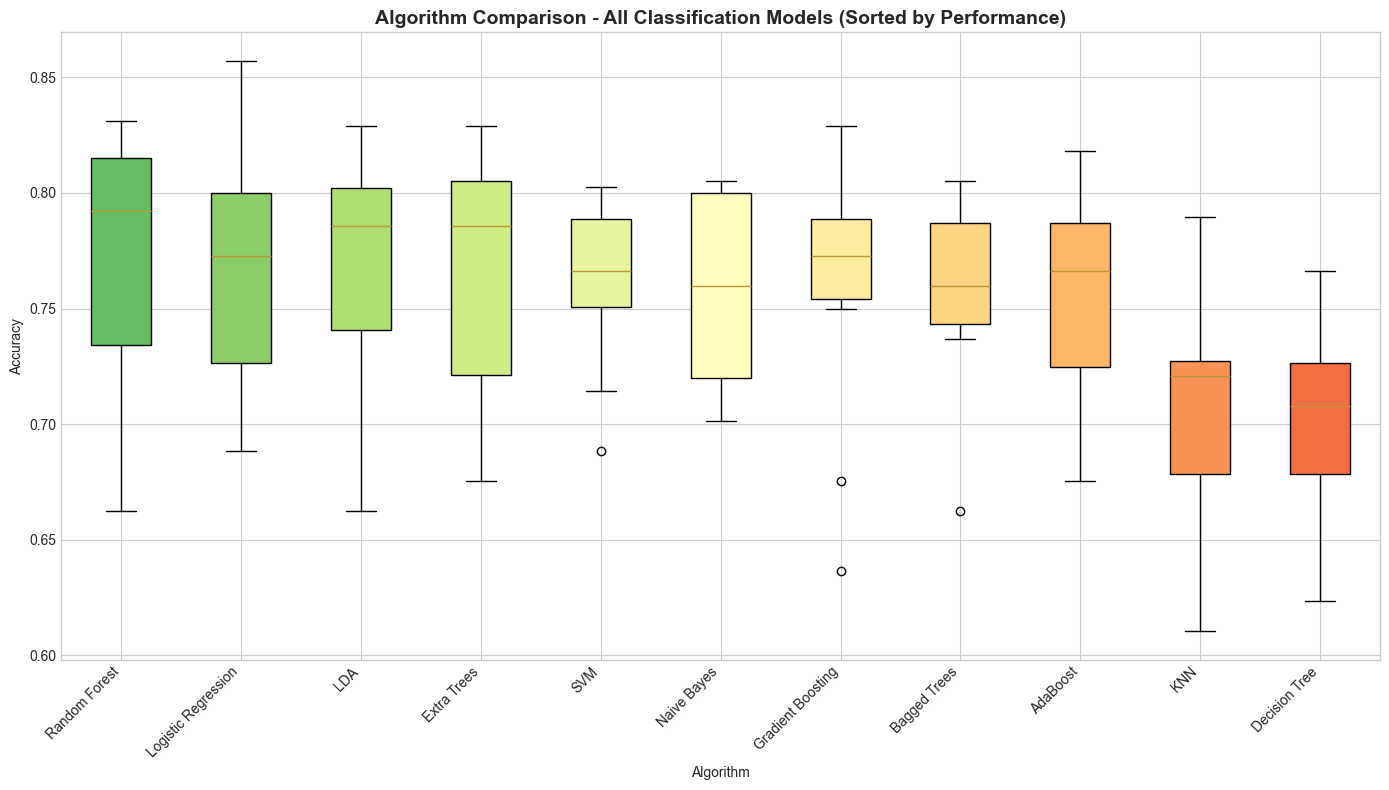

In [54]:
# Final Summary: All Classification Algorithms Comparison
print("=" * 80)
print("FINAL SUMMARY: CLASSIFICATION ALGORITHMS PERFORMANCE")
print("=" * 80)

# All models to compare
all_models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear', max_iter=1000)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC()),
    ('Bagged Trees', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=7)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=7)),
    ('Extra Trees', ExtraTreesClassifier(n_estimators=100, random_state=7)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=7, algorithm='SAMME')),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=7)),
]

results_all = []
names_all = []

print("\n" + "-" * 80)
print(f"{'Rank':<6} {'Algorithm':<25} {'Accuracy':>15} {'Std':>15}")
print("-" * 80)

for name, model in all_models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results_all.append((name, cv_results.mean(), cv_results.std(), cv_results))
    names_all.append(name)

# Sort by accuracy
results_all.sort(key=lambda x: x[1], reverse=True)

for i, (name, mean, std, _) in enumerate(results_all):
    print(f"{i+1:<6} {name:<25} {mean*100:>14.3f}% {std*100:>14.3f}%")

print("-" * 80)
print(f"\n🏆 Best Algorithm: {results_all[0][0]} with {results_all[0][1]*100:.3f}% accuracy")

# Visualization
fig, ax = plt.subplots(figsize=(14, 8))
sorted_results = [r[3] for r in results_all]
sorted_names = [r[0] for r in results_all]
bp = ax.boxplot(sorted_results, labels=sorted_names, patch_artist=True)

# Color the boxes
colors = plt.cm.RdYlGn(np.linspace(0.8, 0.2, len(sorted_results)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title('Algorithm Comparison - All Classification Models (Sorted by Performance)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---

## References

1. **Brownlee, J.** (2016). *Machine Learning Mastery With Python*. Machine Learning Mastery.
2. **Pedregosa et al.** (2011). *Scikit-learn: Machine Learning in Python*. JMLR 12, pp. 2825-2830.
3. **UCI Machine Learning Repository** - Pima Indians Diabetes Dataset
4. **UCI Machine Learning Repository** - Boston Housing Dataset

---

**End of Notebook**

*This notebook was created as a comprehensive implementation of machine learning techniques following the "Machine Learning Mastery With Python" book by Jason Brownlee.*